<a href="https://colab.research.google.com/github/acosta8108/Ayudas_Geotecnia/blob/main/Increment_Esfuer_Vertical_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cimentaciones superficiales: Incremento del esfuerzo vertical en una masa de suelo.  Causado por carga de la cimentacion.
<br/>
<Strong>Esfuerzo debido a una carga concentrada.</Strong>  

ΔP=3P / (2ΠZ^2(1+(r/Z)^2)^(5/2))  
r=(X^2+Y^2)^(1/2)  
X, Y, Z= Coordenadas del punto A  
<br/>
<img src='https://drive.google.com/uc?export=view&id=1fxjJYZic9jdW9Jj2R2A0-qII8KVy79eL' alt='Esquema' width='250px'/>
<br/>

<Strong>Supuestos de la fórmula de Boussinesq</Strong>  
La fórmula de la teoría de Boussinesq se basa en los siguientes supuestos.  
1. La masa del suelo es semiinfinita, homogénea e isotrópica.  
2. El suelo tiene una relación tensión-deformación lineal,  
3. El suelo es ingrávido.  
4. La carga es una carga puntual que actúa sobre la superficie.


In [182]:
#@title No 1: Importar modulos

# Importar modulos a utilizar
import numpy as np
import matplotlib.pyplot as plt

In [183]:
#@title No 2: Definicion de variables iniciales

# Definicion de variables iniciales:
p=1   # Carga puntual. Unidades de peso (Kg).
x=1   # Coordanada X del punto A (m).
y=0   # Coordanada Y del punto A (m).
z=1  # Coordanada Z del punto A (m).

# Definicion del plano de proyeccion y vector de dimension
# Nota: La funcion range trabaja con numero enteros, no trabaja con flotante
# Eje principal y
y=0
# Rango en x.  Valores enteros
xini=-3
xfin=3
xstep=20    # escala 1:xstep
rangox=list(range((xini*xstep), (xfin*xstep+1)))
longix=len(rangox)
rangox=np.array([rangox])/xstep
#print(rangox)
# Rango en z
zini=0
zfin=3
zstep=20  # escala 1:zstep
rangoz=list(range((zini*zstep), (zfin*zstep+1)))
rangoz.pop(0)    # se elimina el vaor de cero '0'
rangoz=np.array(rangoz)/zstep
longiz=len(rangoz)
var1=0
#print(rangoz)

# Generar matriz z:x
# Generar matriz de unos
matriz1=np.ones(longix*longiz)
matriz1=matriz1.reshape(longiz, -1)
# Generacion matrizy
matrizy=matriz1*0
# Generacion matrizx
matrizx=np.array(rangox)
for i in range(1, longiz, 1):
  matrizx=np.concatenate((matrizx, rangox))
#print(matrizx)
# Generar matrizz
matrizz=np.array(rangoz)
for i in range(1, longix, 1):
  matrizz=np.concatenate((matrizz, rangoz))
matrizz=matrizz.reshape([longix, -1]).transpose()

In [184]:
#@title No 3: Script calculo incremento de esfuerzo vertical

# Definicion de r.  Calculo de la ditancia r del punto A (m)
matrizr=(matrizx**2+matrizy**2)**(1/2)
# Definicion de relacion r/z
matrizrz=matrizr/matrizz

# Definicion Factor IB
matrizIB=3/(2*np.pi)*1/(1+matrizrz**2)**(5/2)
# Definicion Δσ delta sigma del esfuerzo unitario
matrizDelta=matrizIB/matrizz**2
# Limpiar la matrizDeltaSigma, de todos los incrementos mayores a la unidad convertirlo en la unidad
matrizDelta[matrizDelta>1]=1
# Matriz de Esfuerzos
matrizE=matrizDelta*p
matrizE=np.round(matrizE, 2)

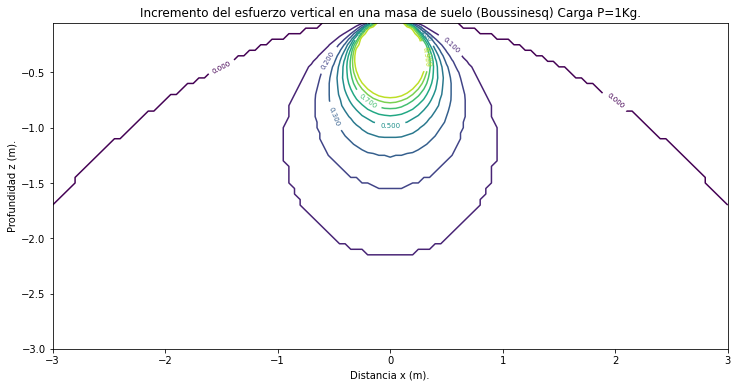

<Figure size 3600x3600 with 0 Axes>

In [185]:
#@title No 4: Script graficar linas de contorno

# https://matplotlib.org/stable/plot_types/arrays/contour.html#sphx-glr-plot-types-arrays-contour-py
# Make data
# Preparar los datos para imprimir
if var1==0:
  matrizz=matrizz*(-1)
  var1=1

levels=np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])*p  # se debe colocar algun factor para las lineas de nivel

# Plot
fig, ax = plt.subplots()
#ax.contour(matrizx, matrizz, matrizE, levels=levels)
cs=ax.contour(matrizx, matrizz, matrizE, levels=levels)
plt.figure(figsize=(50,50))
factx=200      # factor tamaño de la grafica
factz=200      # factor tamaño de la grafica
fig.set_size_inches(longix*xstep/factx, longiz*zstep/factz)
# Etiquetas
title1='Incremento del esfuerzo vertical en una masa de suelo (Boussinesq) Carga P='+ str(p)+'Kg.'
ax.set_title(title1)
ax.set_xlabel('Distancia x (m).')
ax.set_ylabel('Profundidad z (m).')
ax.clabel(cs, levels, inline=True, fontsize=7, )

plt.show()

In [186]:
#@title Cambiar magnitud carga aplicada (Ejecutar Script No 3 y 4 para actualizar grafica): 

p=float(input('Ingresar la nueva magnitud de la carga en Kg: '))

Ingresar la nueva magnitud de la carga en Kg: 1
